# CHENNAI RESERIORS WATER MANAGEMENT EXPLORATION

## 1. Data OverView

Chennai is a city located in the Indian state Tamil Nadu. It serves as the capital of Tamil Nadu, and the city and surrounding area serve as a major economic centers in India. It is also the place where both my parents (and most of my family) were born.

Recently this area has been suffering from serious water shortages. This is due in part to two years of inadequate monsoon seasons, but increasing urbanization have caused some encroachment on water bodies in and around the region. In this notebook We'll be looking through to see if we can identify any trends in the data, and by providing visuals hopefully we can share just how dire the situation in Chennai is. Perhaps we can see whether or not the rainfall data included is tied to the reservoir levels.

In [17]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings(action="ignore")
import plotly

from plotly import tools
pyo.init_notebook_mode(connected=True)
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
df_level = pd.read_csv('chennai_reservoir_levels.csv')
df_rain = pd.read_csv('chennai_reservoir_rainfall.csv')

In [4]:
df_level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [5]:
df_rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,0.0,0.0,0.0,0.0
1,02-01-2004,0.0,0.0,0.0,0.0
2,03-01-2004,0.0,0.0,0.0,0.0
3,04-01-2004,0.0,0.0,0.0,0.0
4,05-01-2004,0.0,0.0,0.0,0.0


## 2. Data Cleanning

We see above that there are ascending dates starting from January 1st, 2004 for both dataframes on the far left, and that the subseqent columns document the reservoir levels and rainfall levels per-day for each of the main reservoirs in Chennai.

We know that there's no missing data in this dataset although whether or not the data is accurate remains to be seen. We can verify that there's no missing data by checking to see how many of the reservoir columns are null with the isnull() method. This method returns a boolean frame documenting where the condition we're checking for is True. In Python, True is an alias for the value 1 and False is an alias for 0. Therefore, if we sum across all columns in this boolean frame, we'll get a count of all the responses that are null. If we do this below, we'll see the sums for both frames is 0, indicating that there are no null values.

In [6]:
print(df_level.isnull().sum(), '\n\n', df_rain.isnull().sum())

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64 

 Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64


## 3. Data Analysis

### Water Level Analysis

The average reservoir level from january to december is being calculated and is being bar graphed against the year. A trend can be seen where the water level seem to vary very little in the begining but it can be seen that the water level is being decreasing each year as we approach 2019 i.e. the present year.

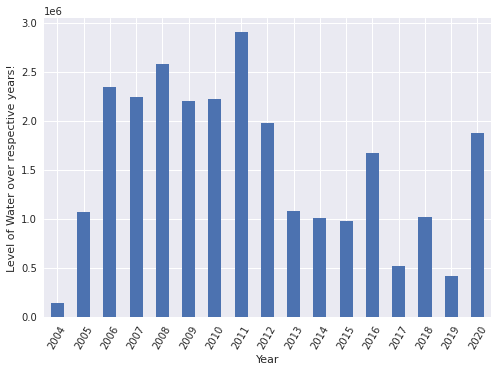

In [35]:
df_level['Date'] = pd.to_datetime(df_level['Date'],format = '%d-%m-%Y')
df_level['Year'] = df_level['Date'].dt.year
df_level['Month'] = df_level['Date'].dt.month
df_level['Quarter'] = df_level['Date'].dt.quarter
df_level['Total'] = df_level['POONDI'] + df_level['REDHILLS'] + df_level['CHEMBARAMBAKKAM'] + df_level['CHOLAVARAM']

grp_by_year = df_level.groupby('Year')['Total'].sum()
grp_by_year.plot(kind = 'bar');
plt.ylabel('Level of Water over respective years!');
plt.xticks(rotation=60);

#### Contribution of Different Reserviors

In [20]:
df_POONDI = df_level[['POONDI','Year','Total']]
df_REDHILLS = df_level[['REDHILLS','Year','Total']]
df_CHEMBARAMBAKKAM = df_level[['CHEMBARAMBAKKAM','Year','Total']]
df_CHOLAVARAM = df_level[['CHOLAVARAM','Year','Total']]
df_POONDI.head(10)

,POONDI,Year,Total
0,3.9,2004,271.9
1,3.9,2004,271.9
2,3.9,2004,270.9
3,3.9,2004,270.9
4,3.8,2004,270.8
5,3.8,2004,269.8
6,3.8,2004,269.8
7,3.7,2004,268.7
8,3.7,2004,267.7
9,3.7,2004,267.7


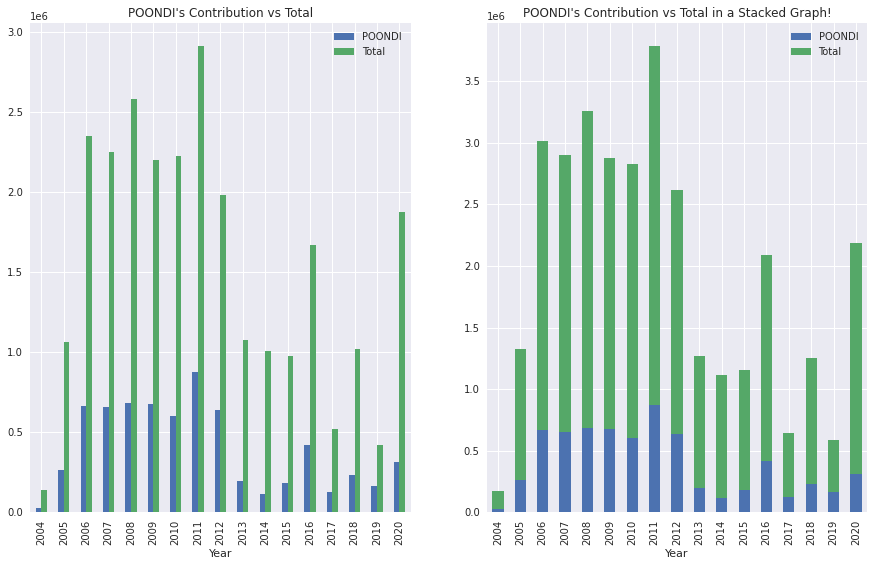

In [21]:
# 1st is Pondi!
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
grp_POONDI_comp = df_POONDI.groupby('Year')[['POONDI','Total']].sum()
grp_POONDI_comp.plot(kind='bar',ax=plt.gca());
plt.title("POONDI's Contribution vs Total");
plt.subplot(1,2,2)
grp_POONDI_comp.plot(kind='bar',stacked=True,ax=plt.gca());
plt.title("POONDI's Contribution vs Total in a Stacked Graph!");

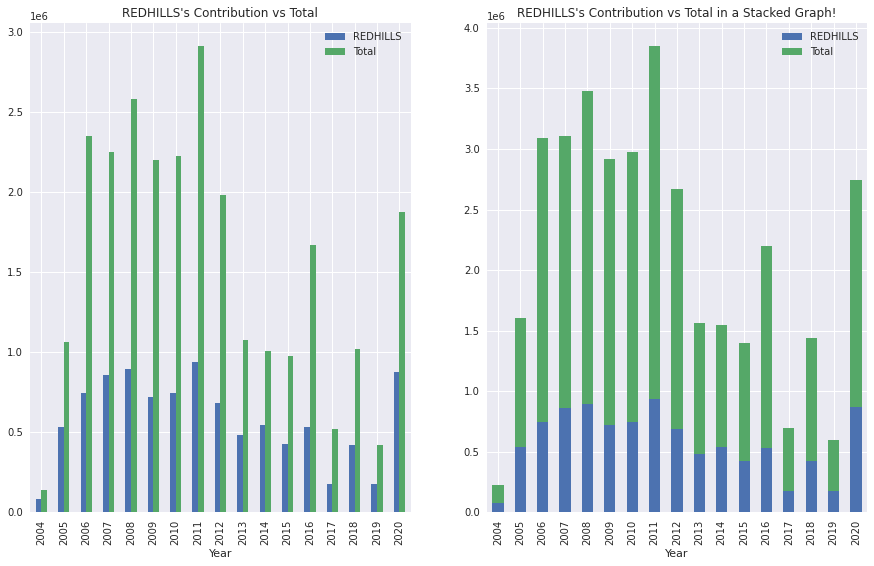

In [22]:
# 2nd Comes Redhills!
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
grp_REDHILLS_comp = df_REDHILLS.groupby('Year')[['REDHILLS','Total']].sum()
grp_REDHILLS_comp.plot(kind='bar',ax=plt.gca());
plt.title("REDHILLS's Contribution vs Total");
plt.subplot(1,2,2)
grp_REDHILLS_comp.plot(kind='bar',stacked=True,ax=plt.gca());
plt.title("REDHILLS's Contribution vs Total in a Stacked Graph!");

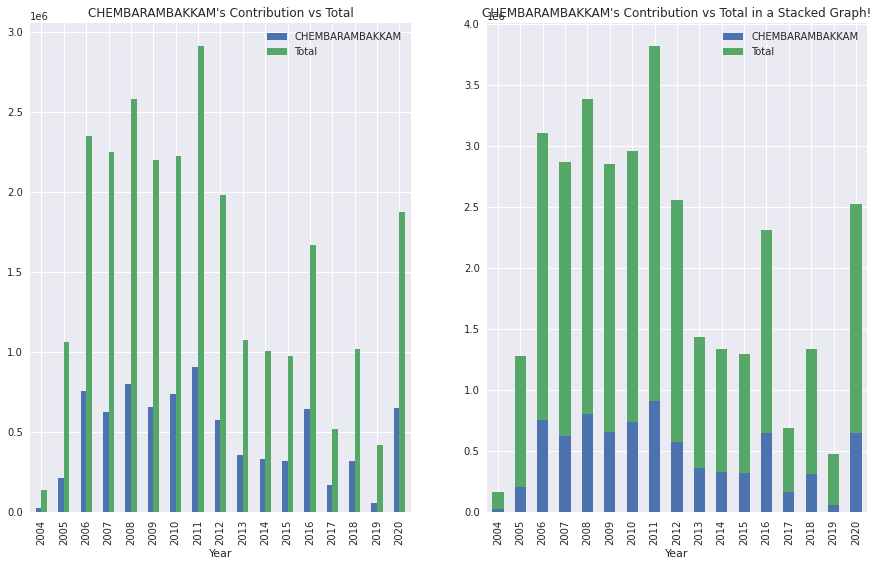

In [23]:
# 3rd Comes CHEMBARAMBAKKAM!
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
grp_CHEMBARAMBAKKAM_comp = df_CHEMBARAMBAKKAM.groupby('Year')[['CHEMBARAMBAKKAM','Total']].sum()
grp_CHEMBARAMBAKKAM_comp.plot(kind='bar',ax=plt.gca());
plt.title("CHEMBARAMBAKKAM's Contribution vs Total");
plt.subplot(1,2,2)
grp_CHEMBARAMBAKKAM_comp.plot(kind='bar',stacked=True,ax=plt.gca());
plt.title("CHEMBARAMBAKKAM's Contribution vs Total in a Stacked Graph!");

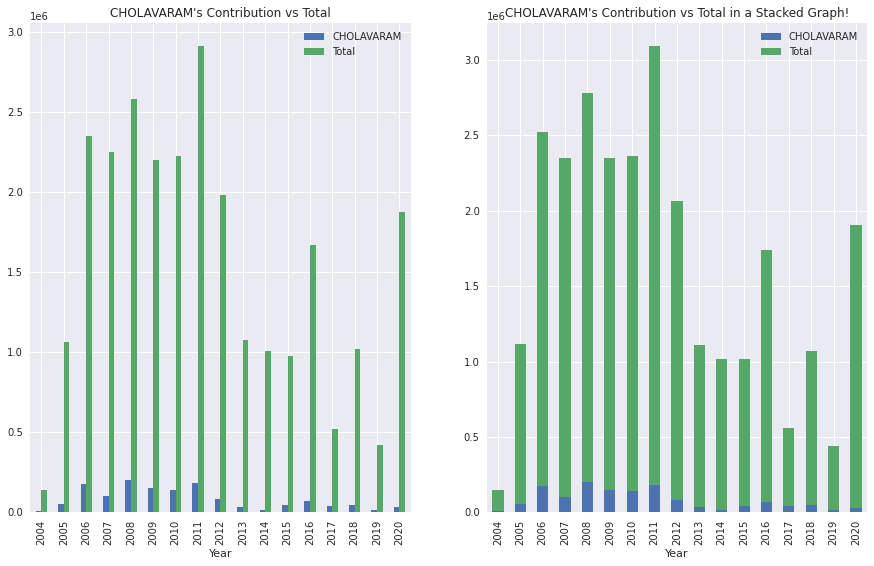

In [24]:
# 4th Comes CHOLAVARAM!
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
grp_CHOLAVARAM_comp = df_CHOLAVARAM.groupby('Year')[['CHOLAVARAM','Total']].sum()
grp_CHOLAVARAM_comp.plot(kind='bar',ax=plt.gca());
plt.title("CHOLAVARAM's Contribution vs Total");
plt.subplot(1,2,2)
grp_CHOLAVARAM_comp.plot(kind='bar',stacked=True,ax=plt.gca());
plt.title("CHOLAVARAM's Contribution vs Total in a Stacked Graph!");

### Rainfull Analysis

“The city has neglected all its water bodies and efforts to improve and recharge in the past decade,” said Sunita Narain, director general of the New Delhi-based Centre for Science and Environment. “Water crisis will be here to stay if we don’t understand the need to save every drop of water and rain.”

First Chennai received the lowest rainfall in 15 years in 2018. The poor rainfall didn’t stop indiscriminate use of water from the city’s four reservoirs, which has contributed to a crunch this year, said Jyoti Sharma, who heads a non-profit working to conserve water. The city’s reservoirs have less than 1% of capacity as on Monday, that compares with 20% a year earlier, according to data on the Chennai Metropolitan Water Supply & Sewerage Board.

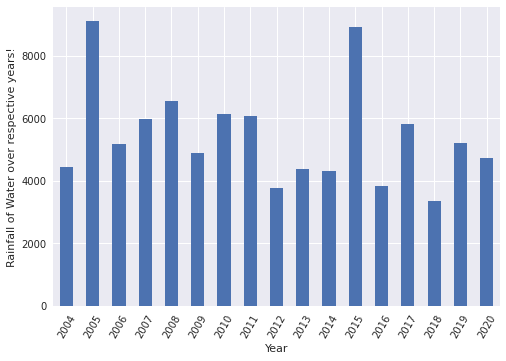

In [36]:
df_rain['Date'] = pd.to_datetime(df_rain['Date'],format = '%d-%m-%Y')
df_rain['Year'] = df_rain['Date'].dt.year
df_rain['Month'] = df_rain['Date'].dt.month
df_rain['Quarter'] = df_rain['Date'].dt.quarter
df_rain['Total'] = df_rain['POONDI'] + df_rain['REDHILLS'] + df_rain['CHEMBARAMBAKKAM'] + df_rain['CHOLAVARAM']
grp_by_year = df_rain.groupby('Year')['Total'].sum()
grp_by_year.plot(kind='bar');
plt.ylabel('Rainfall of Water over respective years!');
plt.xticks(rotation=60);

Secondly, it does appear that 2018 was not a very good rainfall year (which is one of the listed reasons for the drought that's occurring in Chennai now). A few of the other years look similar, 2012-2014 appears to have low rainfall levels and we see corresponding decreases in reservoir levels in most of the regions. Right now, I'm interested in how bad 2018 was, so let's take a look at the aggregated rainfall across all the regions per year.

In [30]:
rainfall_2015=df_rain[(df_rain["Year"]==2015)&((df_rain["Month"]==11)|(df_rain["Month"]==12))]

data=[(go.Scatter(x=rainfall_2015["Date"],y=rainfall_2015[i],mode="lines",name=i)) for i in rainfall_2015.columns[1:5]]

layout=go.Layout(title=dict(text="Rainfall Level in Reservoirs"),width=1000)

fig=go.Figure(data=data,layout=layout)
pyo.iplot(fig)

Here we can have a comparation with Reserviors Level

In [31]:
rainfall_2015=df_level[(df_level["Year"]==2015)&((df_level["Month"]==11)|(df_level["Month"]==12))]

data=[(go.Scatter(x=rainfall_2015["Date"],y=rainfall_2015[i],mode="lines",name=i)) for i in rainfall_2015.columns[1:5]]

layout=go.Layout(title=dict(text="Reservoirs Level"),width=1000)

fig=go.Figure(data=data,layout=layout)
pyo.iplot(fig)

#### Indication:
- In the rainfall graph,we could see 4 peaks of rainfall in November month.
- The first set of rainfall which started on Nov'8 and third set which ended on Nov'17 filled all our reserviors.
- The last peak rains were extraoridnary which was same as the sum three set of rainfalls received before were not clearly useful as the reservors already reached peak levels.

### Water management and Population

According to UN World Urbanization Prospects (& some information available here http://worldpopulationreview.com/world-cities/chennai-population/ basis that), below is the population of Chennai over the years, growing at 2.6% annually. Year Population 2005 7476986 2006 7671387.636 2007 7870843.715 2008 8075485.651 2009 8285448.278 2010 8500869.933 2011 8721892.552 2012 8948661.758 2013 9181326.964 2014 9420041.465 2015 9664962.543 2016 9916251.569 2017 10174074.11 2018 10438600.04 2019 10710003.64

In [32]:
# Create data frame for population
data = {'Year':[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],'Population':[7476986,7671388,7870844,8075486,8285448,8500870,8721893,8948662,9181327,9420041,9664963,9916252,10174074,10438600,10710004]}
df_population = pd.DataFrame(data)

In [33]:
df_population.head()

,Year,Population
0,2005,7476986
1,2006,7671388
2,2007,7870844
3,2008,8075486
4,2009,8285448


In [39]:
df_water_usage_year = pd.DataFrame(df_level.groupby('Year')[['Total','POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())
df_water_usage_quarter = pd.DataFrame(df_level.groupby(['Year','Quarter'])[['Total','POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())

df_water_usage_year.reset_index(inplace=True)
df_water_usage_quarter.reset_index(inplace=True)

# Merge with population data to check water usage 
df_water_usage_year = pd.merge(df_water_usage_year,df_population,on='Year')
df_water_usage_quarter = pd.merge(df_water_usage_quarter,df_population,on='Year')

Text(0, 0.5, 'Population (10 million)')

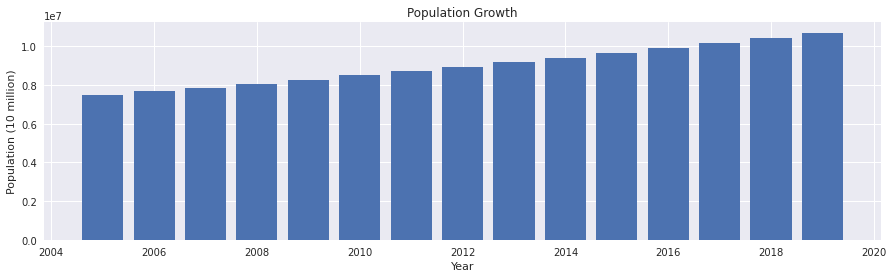

In [40]:
plt.figure(figsize=(15,4))
plt.bar(df_population['Year'],df_population['Population'])
plt.title('Population Growth')
plt.xlabel('Year')
plt.ylabel('Population (10 million)')

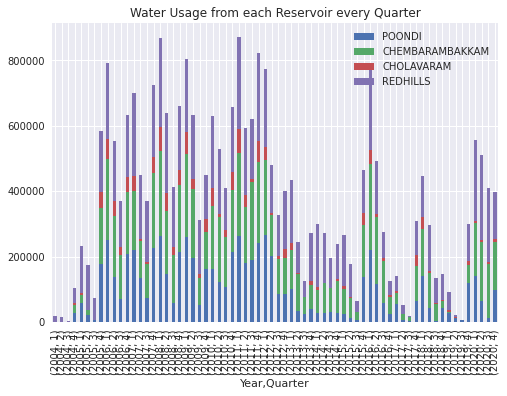

In [42]:
# Plot stacked bar of water usage from each reservoir
df_water_usage_quarter_2 = pd.DataFrame(df_level.groupby(['Year','Quarter'])[['POONDI','CHEMBARAMBAKKAM','CHOLAVARAM','REDHILLS']].sum())
a = df_water_usage_quarter_2.plot(kind='bar',stacked=True)
plt.savefig('stacked.png')
plt.title('Water Usage from each Reservoir every Quarter')
plt.show()

More water seems to be used from Red Hills & Poondi, than the rest 2

- While very year, replenishment happens in 4th quarter when the city receives North East Monsoon, 2016 seems to be the driest year so far with very minimal replenishment.
- Post 2015, POONDI, REDHILLS were used as usual. This could be one of the major causes for crisis, as these 2 are the major reservoirs

In [44]:
# Calculate Water usage per person 
df_water_usage_year['Usage_per_person'] = df_water_usage_year['Total']/df_water_usage_year['Population']

Text(0.5, 1.0, 'Usage per person over years')

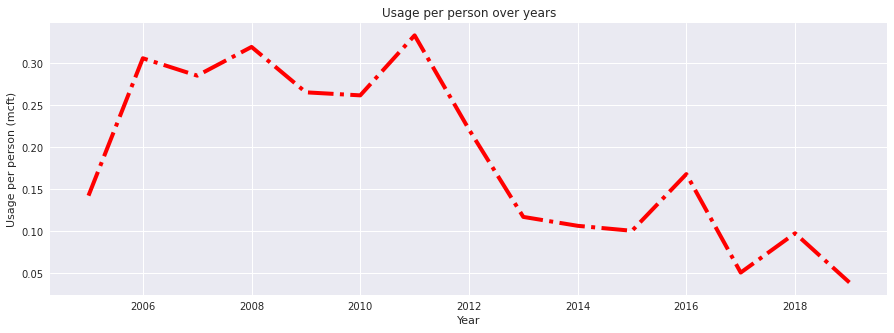

In [45]:
plt.figure(figsize=(15,5))
plt.plot(df_water_usage_year['Year'],df_water_usage_year['Usage_per_person'], lw=4,c='red',ls='-.')
plt.xlabel('Year')
plt.ylabel('Usage per person (mcft)')
plt.title('Usage per person over years')

- As we have seen 2011 is the driest year & the same year has maximum usage of reservoir water per person.
- Owing to less/no rains, it seems groud water couldn't cater to the needs. Hence people had to rely on more resevoir water in 2016.
- As 2017 again has good rains (comparitively), water usage from resevoirs has reduced in 2018.
- However, on the initial analysis, we are having a delayed effect of 2016 even now, coupled with increasing population, water needs & weak monsoons.